[8.89807803e+01 1.04710544e+01 4.68194972e-01 7.99703179e-02]


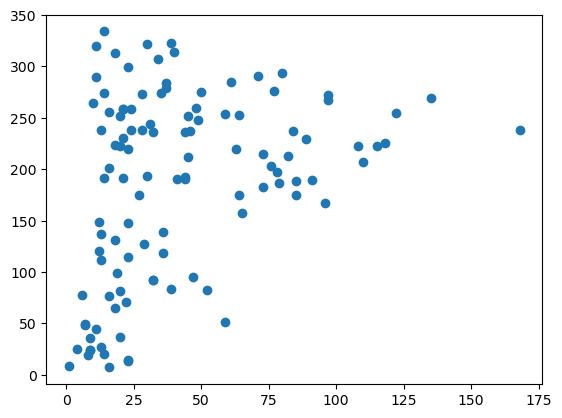

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import dataset from file in folder

dataset = pd.read_csv('airquality.dat', delimiter='\t')
dataset = np.genfromtxt('airquality.dat')

# keep only the first 4 columns
dataset = dataset[:,0:4]

# exclude rows with nan values
dataset = dataset[~np.isnan(dataset).any(axis=1)]

# find the 2 principal components

from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(dataset)

# print variants of components
print(pca.explained_variance_ratio_ * 100)

# plot the 2 principal components
plt.scatter(dataset[:,0], dataset[:,1])


# Part 2

[[0.08868461 0.07756538 0.05481538 0.30853847 0.1678923  0.08192692]
 [0.09129615 0.08249231 0.06294615 0.32703462 0.17642692 0.08251923]
 [0.09145769 0.0847     0.06380769 0.35449615 0.18235    0.08588462]
 ...
 [0.10553846 0.09579231 0.08855    0.34386155 0.20388846 0.09525385]
 [0.10675    0.1001     0.08995    0.38058463 0.22225    0.1043    ]
 [0.09651923 0.08453846 0.06359231 0.32003462 0.16183461 0.07856154]]


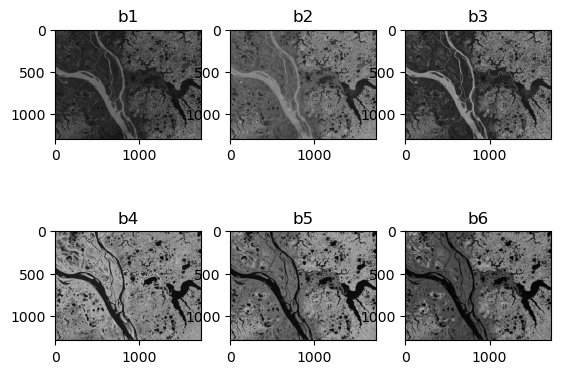

Text(0.5, 1.0, 'b6')

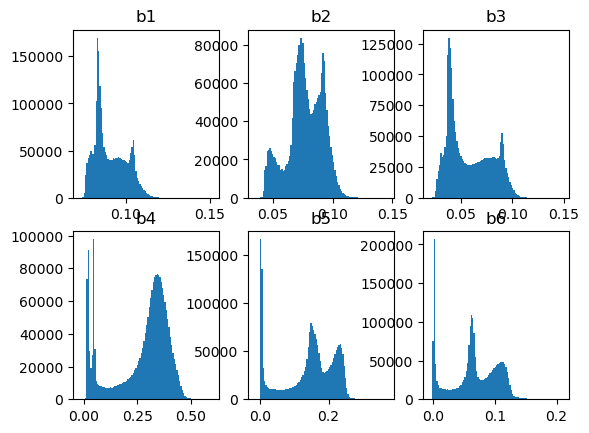

In [37]:
# import tif image in a matrix with different bands each band in a different column of the matrix
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt

dataset = gdal.Open(r'yukon.tif')
# print(dataset.RasterCount)

# since there are 3 bands
# we store in 3 different variables
band1 = dataset.GetRasterBand(1) # Red channel
band2 = dataset.GetRasterBand(2) # Green channel
band3 = dataset.GetRasterBand(3) # Blue channel
band4 = dataset.GetRasterBand(4) # NIR channel
band5 = dataset.GetRasterBand(5) # SWIR1 channel
band6 = dataset.GetRasterBand(6) # SWIR2 channel
b1 = band1.ReadAsArray()
b2 = band2.ReadAsArray()
b3 = band3.ReadAsArray()
b4 = band4.ReadAsArray()
b5 = band5.ReadAsArray()
b6 = band6.ReadAsArray()

# transform b1 into a array of 1 dimension
b1_a = np.reshape(b1, (b1.shape[0]*b1.shape[1]))
b2_a = np.reshape(b2, (b2.shape[0]*b2.shape[1]))
b3_a = np.reshape(b3, (b3.shape[0]*b3.shape[1]))
b4_a = np.reshape(b4, (b4.shape[0]*b4.shape[1]))
b5_a = np.reshape(b5, (b5.shape[0]*b5.shape[1]))
b6_a = np.reshape(b6, (b6.shape[0]*b6.shape[1]))

# stack the 6 bands in a single matrix

bands = np.column_stack((b1_a, b2_a, b3_a, b4_a, b5_a, b6_a))

print(bands)


# put the 3 plots in a single one 3 columns 2 rows

fig, axs = plt.subplots(2, 3)

axs[0, 0].imshow(b1, cmap='gray')
axs[0, 0].set_title("b1")
axs[0, 1].imshow(b2, cmap='gray')
axs[0, 1].set_title("b2")
axs[0, 2].imshow(b3, cmap='gray')
axs[0, 2].set_title("b3")
axs[1, 0].imshow(b4, cmap='gray')
axs[1, 0].set_title("b4")
axs[1, 1].imshow(b5, cmap='gray')
axs[1, 1].set_title("b5")
axs[1, 2].imshow(b6, cmap='gray')
axs[1, 2].set_title("b6")

plt.show()

# print histograms of the 6 bands in a subplot 3 columns 2 rows

fig, axs = plt.subplots(2, 3)

axs[0, 0].hist(b1_a, bins=100)
axs[0, 0].set_title("b1")
axs[0, 1].hist(b2_a, bins=100)
axs[0, 1].set_title("b2")
axs[0, 2].hist(b3_a, bins=100)
axs[0, 2].set_title("b3")
axs[1, 0].hist(b4_a, bins=100)
axs[1, 0].set_title("b4")
axs[1, 1].hist(b5_a, bins=100)
axs[1, 1].set_title("b5")
axs[1, 2].hist(b6_a, bins=100)
axs[1, 2].set_title("b6")



In [40]:
# compute the covariance matrix of the 6 bands

from sklearn.decomposition import PCA

M = np.mean(bands, axis=1)

# center columns by subtracting column means
C = bands - M[:, np.newaxis]

# calculate covariance matrix of centered matrix
V = np.cov(C.T)

eigen_val, eigen_vect = np.linalg.eig(V)

covariance_matrix = np.cov(bands.T)
#print(covariance_matrix)

pca = PCA(n_components=6)
pca.fit(bands)

# print variants of components
print(pca.explained_variance_ratio_ * 100)




[8.89665731e+01 9.43222253e+00 1.52685761e+00 4.83251077e-02
 1.85239788e-02 7.49768769e-03]
